In [9]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime

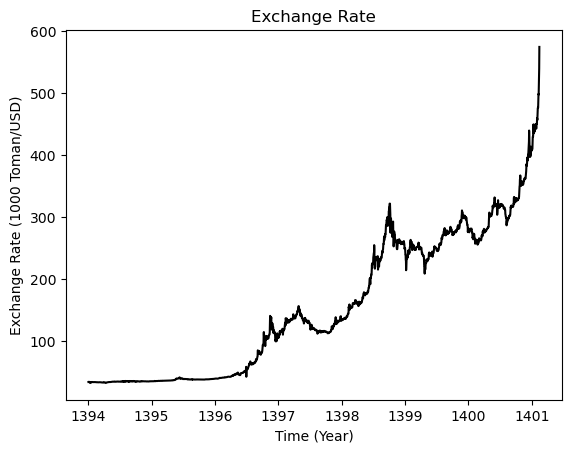

In [10]:
# Import data from usd_toman.txt
data = np.loadtxt('usd_toman.txt')

# Define T as time
T = data.shape[0]
t = np.arange(0, T, 1)

# Define X as the exchange rate
Y = data

# plot the exchange rate
plt.figure()
# start_date = 1394/1/1
start_date = datetime.datetime(1394, 1, 1)
date = [start_date + datetime.timedelta(days=i) for i in range(1 , T+1)]
plt.plot(date, Y/1000, 'black')
plt.title('Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Exchange Rate (1000 Toman/USD)')
plt.show()


In [11]:
# Define the P matrix
P = -2*np.eye(T) + np.eye(T, k=-1) + np.eye(T, k=1)
print(P)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


# Description
The Optmization problem is:
$$
\min_{\mathbf{X}} \frac{1}{2}||\mathbf{X}-\mathbf{Y}||_2^2 + \lambda||\mathbf{P}\mathbf{X}||_2^2
$$

Where P stops data to grow rapidly (It's similar to the discrete version of derivative function) and $\lambda$ controls the weight of the penalty term, we can make $\lambda$ large enough to make the data to be smooth.

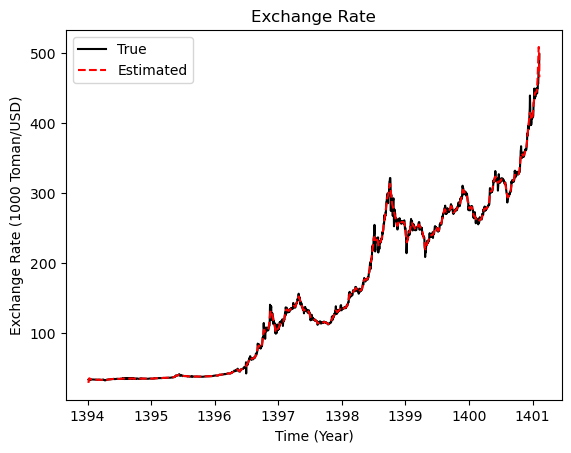

In [12]:
X = cp.Variable(T)
lam = 50
objective = cp.Minimize(0.5*cp.sum_squares(Y-X) + lam*cp.sum_squares(P@X))
problem = cp.Problem(objective)
problem.solve()

# plot the exchange rate
plt.figure()
plt.plot(date[4:T-5], Y[4:T-5]/1000, 'black')
plt.plot(date[4:T-5], X.value[4:T-5]/1000, 'red',  linestyle= 'dashed') 
plt.title('Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Exchange Rate (1000 Toman/USD)')
plt.legend(['True', 'Estimated'], loc='upper left')
plt.show()

I have plotted data from 4d to 2996. why? because the idiotic $P$ makes $-2 x_1$ to be equal to $x_2$ so I have to plot 4d to 2996 to ignore those. 

Here's the uncropped version of the plot:

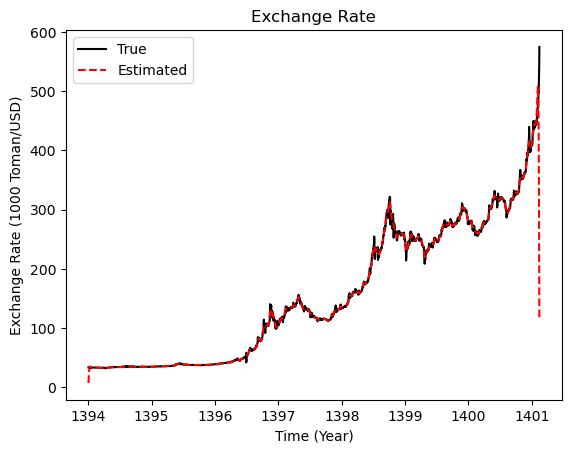

In [13]:
plt.figure()
plt.plot(date, Y/1000, 'black')
plt.plot(date, X.value/1000, 'red',  linestyle= 'dashed')
plt.title('Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Exchange Rate (1000 Toman/USD)')
plt.legend(['True', 'Estimated'], loc='upper left')
plt.show()


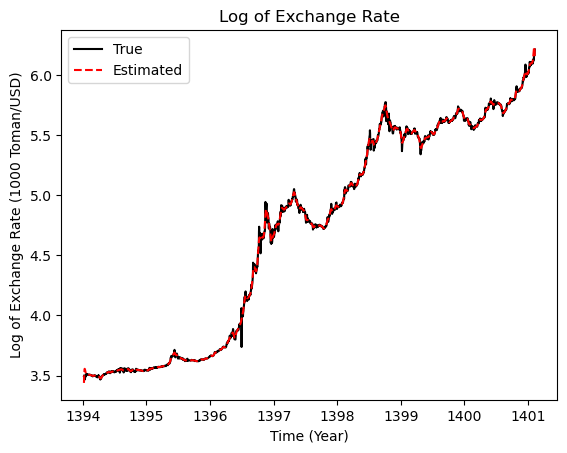

In [14]:
# plot log of the exchange rate
plt.figure()
plt.plot(date[5:T-5], np.log(Y[5:T-5]/1000), 'black')
plt.plot(date[5:T-5], np.log(X.value[5:T-5]/1000), 'red',  linestyle= 'dashed')
plt.title('Log of Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Log of Exchange Rate (1000 Toman/USD)')
plt.legend(['True', 'Estimated'], loc='upper left')
plt.show()


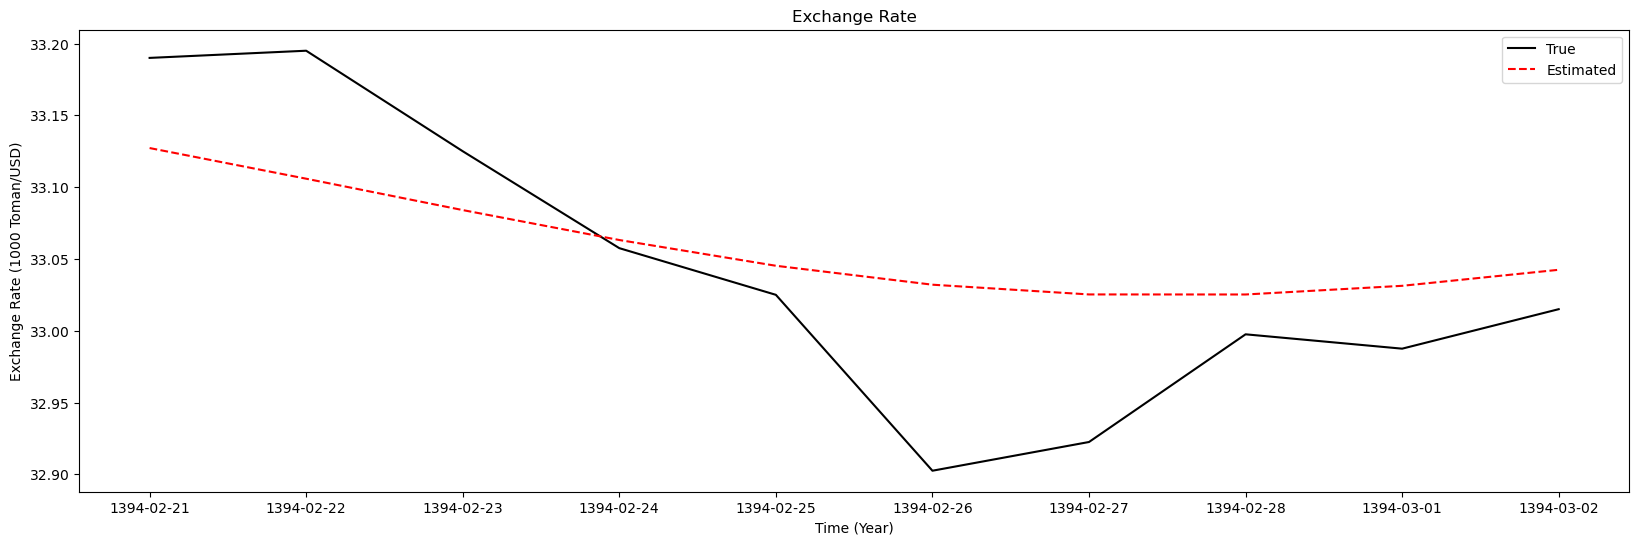

In [15]:
# Zoom in the plot
plt.figure(figsize=(20, 6))
plt.plot(date[50:60], Y[50:60]/1000, 'black')
plt.plot(date[50:60], X.value[50:60]/1000, 'red', linestyle='dashed')
plt.title('Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Exchange Rate (1000 Toman/USD)')
plt.legend(['True', 'Estimated'], loc='best')
plt.show()


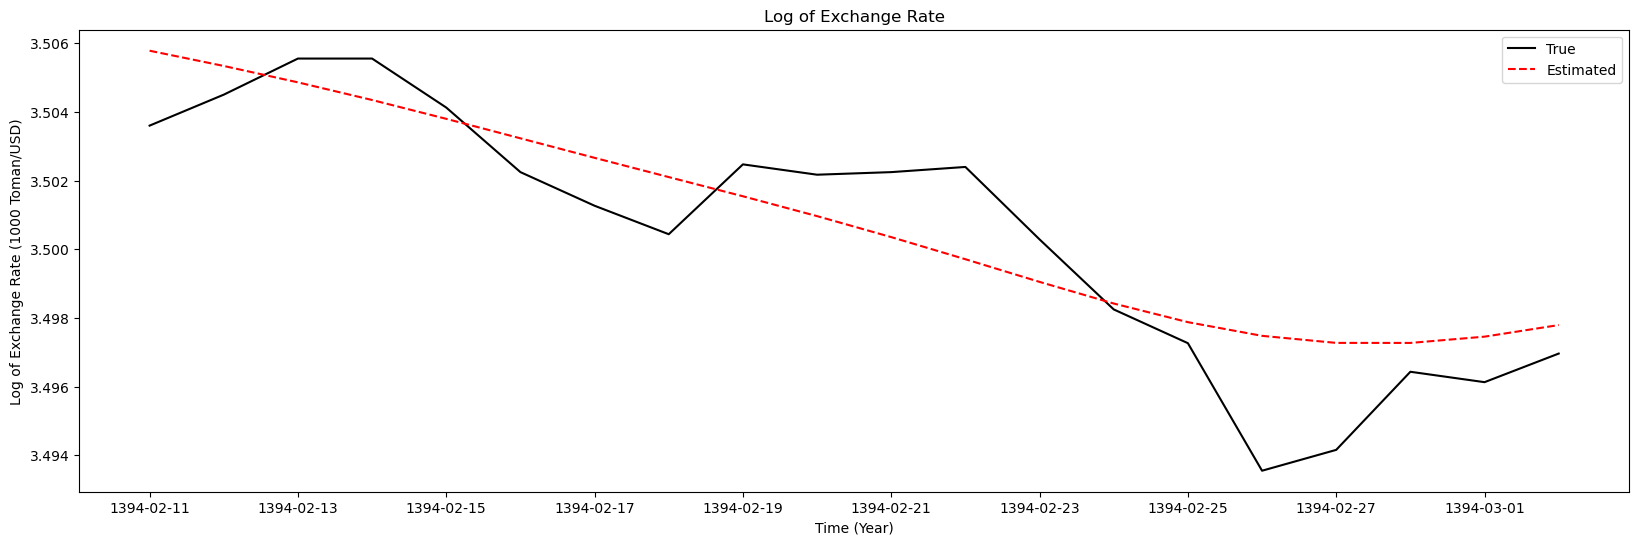

In [16]:
# Zoom in the log plot
plt.figure(figsize=(20, 6)) 
plt.plot(date[40:60], np.log(Y[40:60]/1000), 'black')
plt.plot(date[40:60], np.log(X.value[40:60]/1000), 'red', linestyle='dashed')
plt.title('Log of Exchange Rate')
plt.xlabel('Time (Year)')
plt.ylabel('Log of Exchange Rate (1000 Toman/USD)')
plt.legend(['True', 'Estimated'], loc='best')
plt.show()
